In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [2]:
#reading data into a dataframe

df = pd.read_csv("data.csv")

In [3]:
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Text(0, 0.5, 'CO2 Emissions')

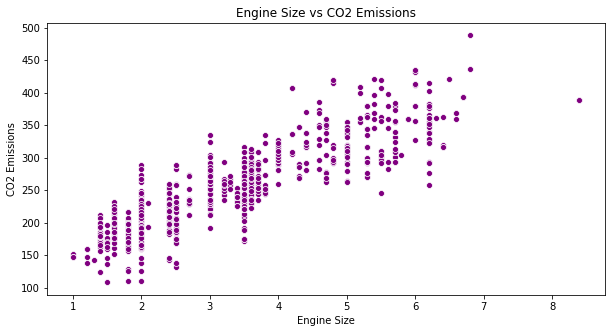

In [5]:
#plotting Engine Size vs CO2 emissions

plt.figure(figsize = (10,5))

sns.scatterplot(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'purple')
plt.title("Engine Size vs CO2 Emissions")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")

In [6]:
#splitting training and test data

mask = np.random.rand(len(df)) < 0.8
train_data = cdf[mask]
test_data = cdf[~mask]

In [7]:
# Polynomical transformation

train_X = np.asanyarray(train_data[['ENGINESIZE']])
train_Y = np.asanyarray(train_data[['CO2EMISSIONS']])

test_X = np.asanyarray(test_data[['ENGINESIZE']])
test_Y = np.asanyarray(test_data[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree = 2) 
train_X_poly = poly.fit_transform(train_X)

In [8]:
# fitting regression curve

regr = linear_model.LinearRegression()

train_X_ = regr.fit(train_X_poly, train_Y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 0.         51.97050842 -1.71589718]]
Intercept:  [105.37800267]


Text(0, 0.5, 'CO2 Emissions')

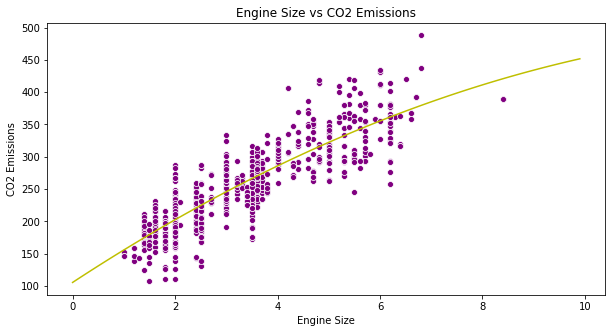

In [9]:
plt.figure(figsize = (10,5))

sns.scatterplot(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'purple')

XX = np.arange(0,10,0.1)
YY = regr.intercept_ + regr.coef_[0][0] * 1 + regr.coef_[0][1] * XX + regr.coef_[0][2] * np.power(XX,2)

plt.plot(XX,YY, color = 'y', label = 'Regression Line')

plt.title("Engine Size vs CO2 Emissions")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")

In [10]:
# finding the R2 score

test_X_poly = poly.fit_transform(test_X)

test_Y_ = regr.predict(test_X_poly)

R2_score = r2_score(test_Y_, test_Y)

print('R2 score is : %.2f' %R2_score)

R2 score is : 0.71


In [11]:
# Regression for higher power polynomials of degree 4

poly_n = PolynomialFeatures(degree = 4)

train_X_poly_n = poly_n.fit_transform(train_X)

In [12]:
# fitting the regression curve

regr_n = linear_model.LinearRegression()

train_Xn_ = regr_n.fit(train_X_poly_n, train_Y)

print('Coeffecients: ', regr_n.coef_)
print('Intercept: ', regr_n.intercept_)

Coeffecients:  [[ 0.00000000e+00  2.63223776e+01  5.05936410e+00 -4.93710749e-01
  -7.53953098e-03]]
Intercept:  [133.16405289]


Text(0, 0.5, 'CO2 Emissions')

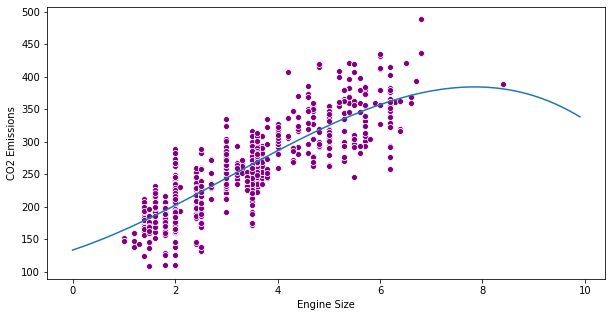

In [13]:
# plotting regression curve

plt.figure(figsize = (10,5))

sns.scatterplot(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'purple')

XX_n = np.arange(0,10,0.1)
YY_n = regr_n.intercept_ + regr_n.coef_[0][0] * 1 + regr_n.coef_[0][1] * XX + regr_n.coef_[0][2] * np.power(XX,2) + regr_n.coef_[0][3] * np.power(XX,3) + regr_n.coef_[0][4] * np.power(XX,4)

plt.plot(XX_n, YY_n)
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")

In [14]:
# R2 score for the 4th order polynomial fit

test_Xn_poly = poly_n.fit_transform(test_X)

test_Yn_ = regr_n.predict(test_Xn_poly)

R2_score_n = r2_score(test_Yn_, test_Y)

print('R2 score: %.2f' %R2_score_n)

R2 score: 0.71
